In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime


//anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year - 1,end.month, end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [3]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.732976,105.642024,103.936627,104.847976,3.770947e+07,103.876512
std,7.708441,7.681284,7.807050,7.765892,1.671176e+07,8.167166
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.295000,98.205000,96.617498,97.289997,2.686492e+07,95.937558
50%,105.730004,106.500000,105.099998,105.915001,3.321345e+07,104.791978
75%,110.890001,112.070000,110.119999,111.287502,4.388320e+07,110.945379
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.910004


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-08 to 2017-01-06
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


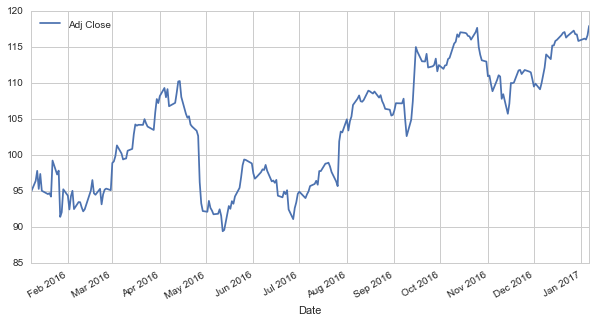

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,5))

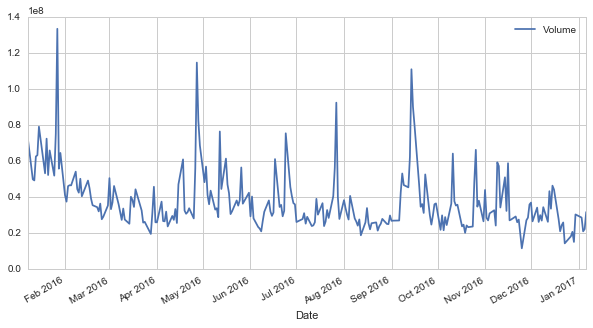

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(10,5))

In [17]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)
    

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


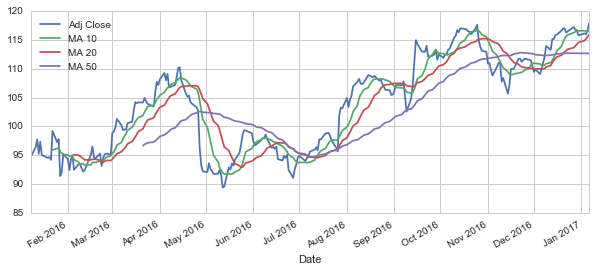

In [18]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

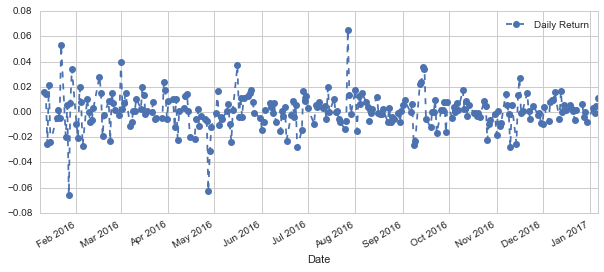

In [19]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


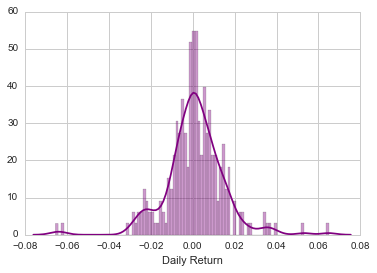

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [25]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-08,94.849671,607.049988,714.469971,50.932406
2016-01-11,96.385500,617.739990,716.030029,50.903205
2016-01-12,97.784376,617.890015,726.070007,51.370385
2016-01-13,95.270312,581.809998,700.559998,50.260832
2016-01-14,97.353950,593.000000,714.719971,51.691573


In [27]:
tech_rets = closing_df.pct_change()

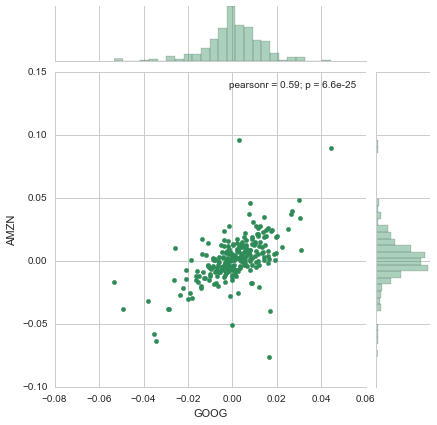

In [31]:
sns.jointplot('GOOG','AMZN',tech_rets,kind='scatter',color='seagreen')

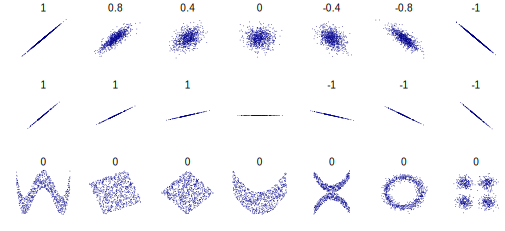

In [33]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

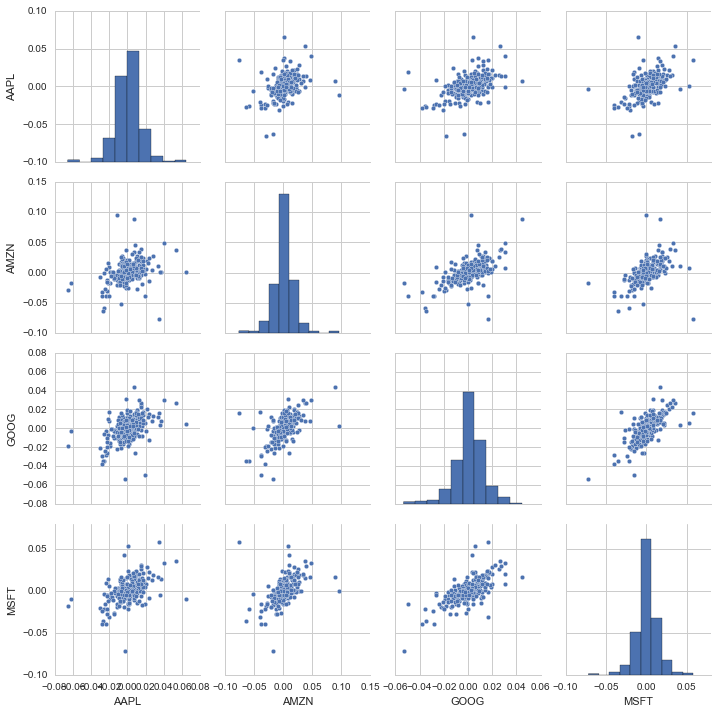

In [34]:
sns.pairplot(tech_rets.dropna())

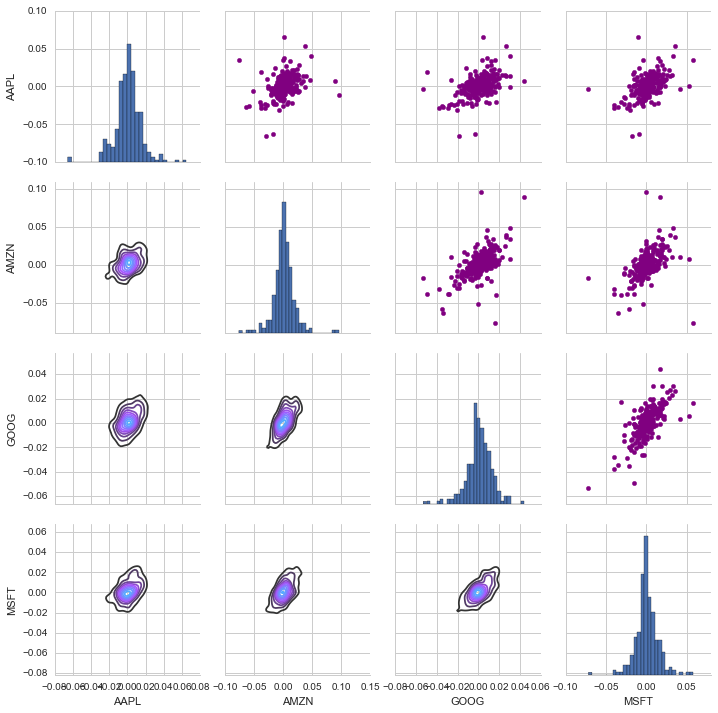

In [36]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

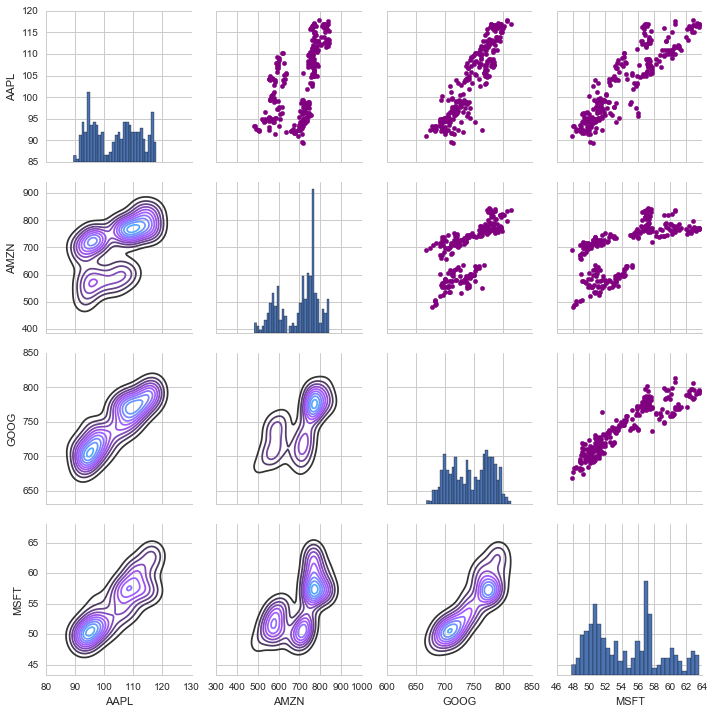

In [37]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

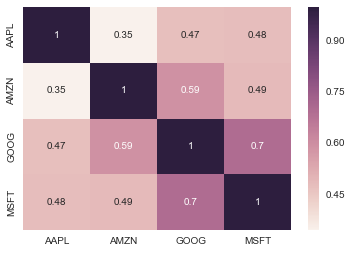

In [38]:
sns.heatmap(tech_rets.corr(),annot=True)

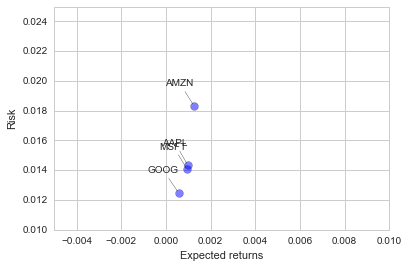

In [41]:
rets = tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 20),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


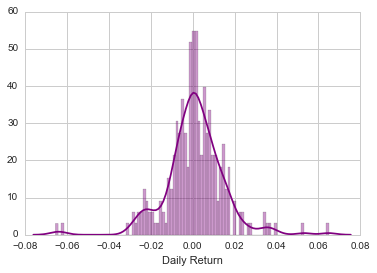

In [45]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [46]:
rets['AAPL'].quantile(0.05)

-0.022627485898497057

In [47]:
days =365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']


In [61]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [62]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-08,731.450012,733.229980,713.000000,714.469971,2450900,714.469971
2016-01-11,716.609985,718.854980,703.539978,716.030029,2090600,716.030029
2016-01-12,721.679993,728.750000,717.317017,726.070007,2024500,726.070007
2016-01-13,730.849976,734.739990,698.609985,700.559998,2501700,700.559998
2016-01-14,705.380005,721.924988,689.099976,714.719971,2225800,714.719971


In [63]:
GOOG.iloc[0,5]

714.46997099999999

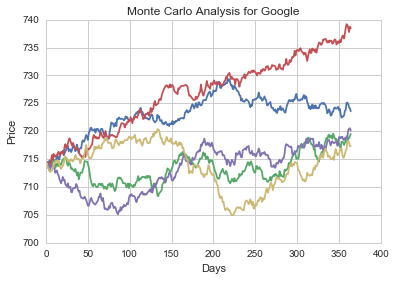

In [64]:
start_price=GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')

In [67]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] =stock_monte_carlo(start_price,days,mu,sigma)[days-1];

(array([ 1.,  0.,  1., ...,  0.,  0.,  1.]),
 array([ 683.59681511,  683.9256196 ,  684.25442408, ...,  748.7001032 ,
         749.02890769,  749.35771217]),
 <a list of 200 Patch objects>)

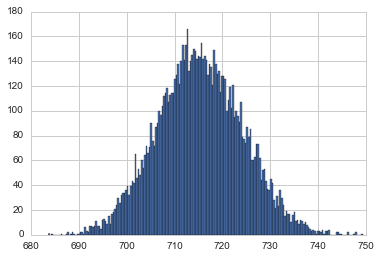

In [68]:
plt.hist(simulations,bins=200)

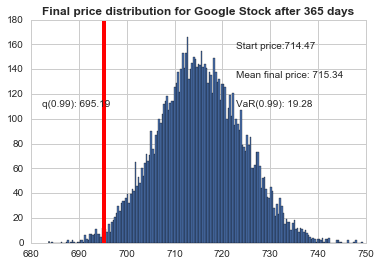

In [70]:
plt.hist(simulations,bins=200)

q=np.percentile(simulations,1)

plt.figtext(0.6,0.8,s="Start price:{:0.2f}".format(start_price))

plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');